# Importing clean dataset


In [56]:
#reading cleaned dataset
import pandas as pd
csv = './clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()
#removing duplicate values
my_df = my_df.drop_duplicates(subset='clean_text', keep='first')

In [60]:
#grouping the results by companies to understand if we have similar number of tweets for each company
my_df[['clean_text', 'pre_clean_len']].groupby(my_df['company_name']).agg(['mean', 'count'])

pre_clean_len        
                                                mean   count
company_name                                                
AT&T Inc.                                 157.180579   80231
Alaska Air Group, Inc.                    153.633430    6198
Alphabet Inc                              177.737749   70997
Amazon.com, Inc.                          193.065520   99100
American Airlines, Inc.                   173.957815   45632
Apple Inc.                                168.048492  321803
Bank of America                           175.370488   18643
Best Buy Co., Inc.                        196.414487     497
CVS Health Corporation                    164.197686   30938
Citigroup Inc.                            169.374645    4930
Colgate-Palmolive Company                 161.840665   13594
Costco Wholesale Corporation              154.709677   43641
Darden Restaurants, Inc.                  178.577049     305
Dell Technologies Inc.                    175.721670   36295
Dollar General Corporation                184.609971     682
Facebook, Inc.                            177.884593  160865
HP Inc.                                   173.678125   43228
JPMorgan Chase & Co.                      189.992844   22637
Kohl's Corporation                        129.847716   56526
Levi Strauss & Co.                        160.603239    1482
Lowe's Companies, Inc.                    167.069265   24038
Lyft, Inc.                                166.944414   40532
Macy's, Inc.                              145.055890   60118
Microsoft Corporation                     177.893031  284493
Molson Coors Beverage Company             161.998701     770
Nordstrom, Inc.                           176.822224   27079
Ross Stores, Inc.                         147.718038   22347
Snap Inc.                                 167.257132   44378
Spirit Airlines, Inc.                     152.548387     465
Spotify Technology S.A.                   190.060288   65652
Sprint Corporation                        196.814893   11831
T-Mobile US Inc.                          112.933358   27145
Target Corporation                        160.060366   48637
The Coca-Cola Company                     148.069702   63757
The Hershey Company                       163.752285   18158
The J. M. Smucker Company                 169.760576    1111
The Kellogg Company                       151.107317     205
The Kroger Company                        160.930048   24188
The PNC Financial Services Group, Inc.    158.934896     384
The Procter & Gamble Company              151.907604   50489
The TJX Companies, Inc.                   155.466368    1338
The Wendy's Company                       180.740964     166
Truist Financial Corp.                    167.036335     633
Twitter, Inc.                             174.252604   88126
Tyson Foods, Inc.                         212.056000     125
U.S. Bancorp                              163.782981    3972
Uber Technologies, Inc.                   169.805356   59822
United Airlines Holdings, Inc.            164.799587   41180
Verizon Communications Inc.               168.300975   42462
Walgreens Boots Alliance, Inc.            160.780171   22613
Walmart Inc.                              171.108877   51581
Wells Fargo & Company                     165.108889   33208
eBay Inc.                                 212.018225   72756

# Generating sentiment from text

In [5]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>


In [6]:
number_favourites = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

In [7]:
my_df["clean_text"] = my_df["clean_text"].apply(str) 
my_df.reset_index(drop=True,inplace=True)

In [8]:
for i in range(0, len(my_df["clean_text"])):
    vs_compound.append(analyzer.polarity_scores(my_df["clean_text"][i])['compound'])
    vs_pos.append(analyzer.polarity_scores(my_df["clean_text"][i])['pos'])
    vs_neu.append(analyzer.polarity_scores(my_df["clean_text"][i])['neu'])
    vs_neg.append(analyzer.polarity_scores(my_df["clean_text"][i])['neg'])

In [9]:
my_df["overall_sentiment"] = vs_compound

In [10]:
len(my_df)

2291983

In [11]:
my_df["positive_sentiment"] = vs_pos

In [12]:
my_df["neutral_sentiment"] = vs_neu

In [13]:
my_df["negative_sentiment"] = vs_neg

In [30]:
my_df.describe()

,index,retweets,favorites,company_id,creation_year,public_year,industry_id,pre_clean_len,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
count,2.291983e+06,2.291983e+06,2.291983e+06,2.291983e+06,1.448330e+06,1.448330e+06,2.291983e+06,2.291983e+06,2.291983e+06,2.291983e+06,2.291983e+06,2.291983e+06,2.291983e+06
mean,1.203464e+06,9.193935e+00,2.361418e+01,2.248031e+01,1.960875e+03,1.952904e+03,3.317321e+00,1.700259e+02,1.247448e+02,2.052102e-01,1.254472e-01,8.296211e-01,4.493083e-02
std,6.945666e+05,2.444840e+02,7.716652e+02,2.790626e+01,4.968467e+01,2.551812e+02,3.661046e+00,7.832441e+01,6.188559e+01,4.301729e-01,1.367036e-01,1.497843e-01,8.851762e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.799000e+03,1.600000e+01,1.000000e+00,1.100000e+01,1.100000e+01,-9.963000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.006025e+05,0.000000e+00,0.000000e+00,2.000000e+00,1.963000e+03,1.980000e+03,1.000000e+00,1.120000e+02,7.700000e+01,0.000000e+00,0.000000e+00,7.310000e-01,0.000000e+00
50%,1.202059e+06,1.000000e+00,3.000000e+00,9.000000e+00,1.976000e+03,1.984000e+03,1.000000e+00,1.520000e+02,1.090000e+02,1.280000e-01,1.000000e-01,8.400000e-01,0.000000e+00
75%,1.804166e+06,4.000000e+00,9.000000e+00,4.600000e+01,1.983000e+03,1.986000e+03,7.000000e+00,2.350000e+02,1.710000e+02,5.719000e-01,2.090000e-01,1.000000e+00,6.200000e-02
max,2.405400e+06,1.392800e+05,4.621190e+05,1.170000e+02,2.011000e+03,2.018000e+03,1.500000e+01,3.399000e+03,4.050000e+02,9.963000e-01,1.000000e+00,1.000000e+00,1.000000e+00


In [49]:
my_df

,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,location,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
0,0,truist,I'm tryna get that Official League license so ...,2017-02-10 02:36:53+00:00,#TRUIST,0.0,0.0,NaN,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,107,tryna get that official league license so can ...,99,0.0000,0.000,1.000,0.000
1,1,truist,Showing up with some goods too. HMU. #TRUIST,2017-02-25 07:25:40+00:00,#TRUIST,1.0,2.0,NaN,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,45,showing up with some goods too hmu truist,41,0.0000,0.000,1.000,0.000
2,2,truist,Should I drop some #SFGiants inspired stuff wi...,2017-03-01 01:37:00+00:00,#SFGiants #TRUIST #HelpMeOut,0.0,1.0,NaN,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,68,should drop some sfgiants inspired stuff with ...,62,0.2732,0.260,0.569,0.171
3,3,truist,Check out Truist Skincare's Lotion Infused Moi...,2017-03-03 16:12:12+00:00,#truist #best #hand #lotion #gloves #nongreasy...,1.0,1.0,@truistskincare,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,136,check out truist skincare lotion infused moist...,111,0.8126,0.363,0.637,0.000
4,4,truist,Designing #TRUIST is a whole different animal ...,2017-03-05 20:57:10+00:00,#TRUIST,0.0,1.0,@TheCraniumCA,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,65,designing truist is whole different animal than,47,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291978,2405396,bank of america,"#Bank of America, BNY Mellon, Citigroup, Goldm...",2020-03-16 02:46:41+00:00,#Bank,0.0,0.0,NaN,20,Charlotte,...,Bank of America,3,Consumer Banking,219,bank of america bny mellon citigroup goldman s...,206,0.2960,0.107,0.847,0.045
2291979,2405397,bank of america,#Bank of #America Pledges $100 Million to Figh...,2020-03-17 22:49:06+00:00,#Bank #America #Health,0.0,0.0,NaN,20,Charlotte,...,Bank of America,3,Consumer Banking,62,bank of america pledges million to fight healt...,54,-0.7717,0.000,0.511,0.489
2291980,2405398,bank of america,Large-denomination bills were in such high dem...,2020-03-17 12:52:05+00:00,#bank #banking #riskmanagement #risk,0.0,0.0,@nytimes,20,Charlotte,...,Bank of America,3,Consumer Banking,241,large denomination bills were in such high dem...,222,0.1027,0.072,0.841,0.087
2291981,2405399,bank of america,@BankofAmerica #bank of America.we were reques...,2020-03-18 10:45:58+00:00,#bank,0.0,0.0,@BankofAmerica,20,Charlotte,...,Bank of America,3,Consumer Banking,99,bank of america we were request you to support...,83,0.4019,0.162,0.838,0.000


# Analyzing per date

In [79]:
#reading csv with the sentiment
my_df = pd.read_csv("twitter_sentiment.csv",index_col=0)
my_df.head()
#removing duplicate values
my_df = my_df.drop_duplicates(subset='clean_text', keep='first')

In [121]:
my_df_2 = my_df.copy()
my_df_2.dtypes

index                   int64
hasthag                object
tweet_text             object
date                   object
hashtags               object
retweets              float64
favorites             float64
mentions               object
company_id              int64
location               object
district               object
creation_year         float64
public_year           float64
ticketname             object
stockindex             object
company_name           object
industry_id             int64
industry_name          object
pre_clean_len           int64
clean_text             object
clean_length            int64
overall_sentiment     float64
positive_sentiment    float64
neutral_sentiment     float64
negative_sentiment    float64
dtype: object

In [122]:
my_df_2["date"] = pd.to_datetime(my_df_2["date"]).dt.date
my_df_2.head()

,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,location,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
0,0,truist,I'm tryna get that Official League license so ...,2017-02-10,#TRUIST,0.0,0.0,NaN,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,107,tryna get that official league license so can ...,99,0.0000,0.000,1.000,0.000
1,1,truist,Showing up with some goods too. HMU. #TRUIST,2017-02-25,#TRUIST,1.0,2.0,NaN,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,45,showing up with some goods too hmu truist,41,0.0000,0.000,1.000,0.000
2,2,truist,Should I drop some #SFGiants inspired stuff wi...,2017-03-01,#SFGiants #TRUIST #HelpMeOut,0.0,1.0,NaN,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,68,should drop some sfgiants inspired stuff with ...,62,0.2732,0.260,0.569,0.171
3,3,truist,Check out Truist Skincare's Lotion Infused Moi...,2017-03-03,#truist #best #hand #lotion #gloves #nongreasy...,1.0,1.0,@truistskincare,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,136,check out truist skincare lotion infused moist...,111,0.8126,0.363,0.637,0.000
4,4,truist,Designing #TRUIST is a whole different animal ...,2017-03-05,#TRUIST,0.0,1.0,@TheCraniumCA,23,Charlotte,...,Truist Financial Corp.,3,Consumer Banking,65,designing truist is whole different animal than,47,0.0000,0.000,1.000,0.000


In [123]:
my_df_2.loc[1,'date']

datetime.date(2017, 2, 25)

In [124]:
my_df_2.dtypes

index                   int64
hasthag                object
tweet_text             object
date                   object
hashtags               object
retweets              float64
favorites             float64
mentions               object
company_id              int64
location               object
district               object
creation_year         float64
public_year           float64
ticketname             object
stockindex             object
company_name           object
industry_id             int64
industry_name          object
pre_clean_len           int64
clean_text             object
clean_length            int64
overall_sentiment     float64
positive_sentiment    float64
neutral_sentiment     float64
negative_sentiment    float64
dtype: object

In [115]:
my_df_2['week'] = pd.to_datetime(my_df_2['date']).dt.week
my_df_2['month'] = pd.to_datetime(my_df_2['date']).dt.month
my_df_2['year'] = pd.to_datetime(my_df_2['date']).dt.year

In [140]:
data = my_df_2[["neutral_sentiment","positive_sentiment", "negative_sentiment","overall_sentiment", "date"]].groupby(['date']).agg(['mean', "count"])

In [141]:
data

neutral_sentiment       positive_sentiment        \
                        mean count               mean count   
date                                                          
2017-01-01          0.815386  2055           0.146349  2055   
2017-01-02          0.819347  2087           0.134913  2087   
2017-01-03          0.835906  2292           0.122431  2292   
2017-01-04          0.825001  2380           0.126802  2380   
2017-01-05          0.826115  2471           0.120234  2471   
...                      ...   ...                ...   ...   
2020-03-26          0.825239  1868           0.117566  1868   
2020-03-27          0.832990  1344           0.112721  1344   
2020-03-28          0.833034   932           0.124887   932   
2020-03-29          0.848577   428           0.122703   428   
2020-03-30          0.845652   112           0.128634   112   

           negative_sentiment       overall_sentiment        
                         mean count              mean count  
date                                                         
2017-01-01           0.038263  2055          0.208110  2055  
2017-01-02           0.045738  2087          0.177467  2087  
2017-01-03           0.041664  2292          0.162183  2292  
2017-01-04           0.048194  2380          0.157861  2380  
2017-01-05           0.053652  2471          0.132609  2471  
...                       ...   ...               ...   ...  
2020-03-26           0.057191  1868          0.152849  1868  
2020-03-27           0.054288  1344          0.145574  1344  
2020-03-28           0.042070   932          0.208227   932  
2020-03-29           0.028706   428          0.232517   428  
2020-03-30           0.025696   112          0.273050   112  

[1185 rows x 8 columns]

In [142]:
#changing the column names 
data = data.reset_index()
data
data.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [143]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

,date,neutral_sentiment_mean,neutral_sentiment_count,positive_sentiment_mean,positive_sentiment_count,negative_sentiment_mean,negative_sentiment_count,overall_sentiment_mean,overall_sentiment_count
0,2017-01-01,0.815386,2055,0.146349,2055,0.038263,2055,0.208110,2055
1,2017-01-02,0.819347,2087,0.134913,2087,0.045738,2087,0.177467,2087
2,2017-01-03,0.835906,2292,0.122431,2292,0.041664,2292,0.162183,2292
3,2017-01-04,0.825001,2380,0.126802,2380,0.048194,2380,0.157861,2380
4,2017-01-05,0.826115,2471,0.120234,2471,0.053652,2471,0.132609,2471
...,...,...,...,...,...,...,...,...,...
1180,2020-03-26,0.825239,1868,0.117566,1868,0.057191,1868,0.152849,1868
1181,2020-03-27,0.832990,1344,0.112721,1344,0.054288,1344,0.145574,1344
1182,2020-03-28,0.833034,932,0.124887,932,0.042070,932,0.208227,932
1183,2020-03-29,0.848577,428,0.122703,428,0.028706,428,0.232517,428


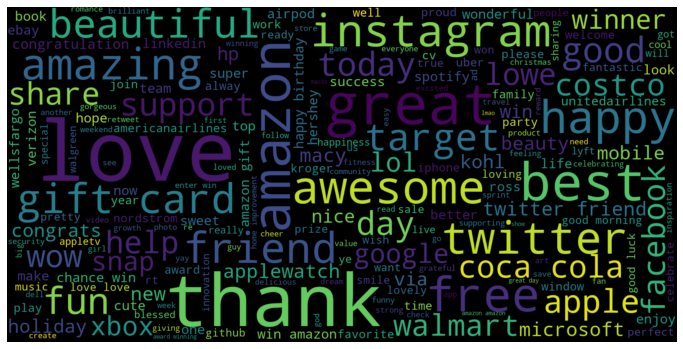

In [34]:
from matplotlib import pyplot as plt

pos_tweets = my_df[my_df.positive_sentiment >= 0.5]
pos_string = []
pos_tweets["clean_text"] = pos_tweets["clean_text"].apply(str) 

for t in pos_tweets.clean_text:
    pos_string.append(t)


pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

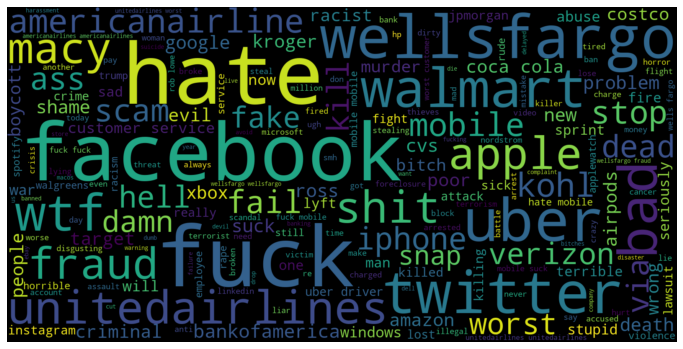

In [35]:
neg_tweets = my_df[my_df.negative_sentiment >= 0.500]
neg_string = []
neg_tweets["clean_text"] = neg_tweets["clean_text"].apply(str) 

for t in neg_tweets.clean_text:
    neg_string.append(t)

neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [144]:
for t in pos_tweets.clean_text[:200]:
    if 'love' in t:
        print (t)

relax at home with your best friends and our truist gloves shop today
muah much love twitter
love me cute beutiful new friends follow like smile happy have fun to followme on twitter socialmedia tagforlikes
happy new year my twitter family peace love
love twitter
thanks for being such amazing involved fans friends thankyou shoutout twitter moments loveourteam we love all the support love
these lovely shirts sweatshirt arrived today love artwork twitter
askjoseph thank you all for the amazing on twitter thank for trending love all
thanks twitter that is sooooo cute made me smile love it
love this art artiststowatch twitter
new twitter theme by thank you love it thanks as well for making this happen
gm fabulous friends in twitter world live laugh and love today is new beginning enjoy and cherish the moments happy wildlifewednesday
never ever thought dat would enjoy your benevolence divine love on twitter thanks lot rock star ji thtweet
big love to all my twitter friends
love me cute beut

In [15]:
#adding clean column to initial dataset
my_df.to_csv('./twitter_sentiment.csv',encoding='utf-8')

# Count Vectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.clean_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
len(cvec.get_feature_names())

In [39]:
import numpy as np
neg_doc_matrix = cvec.transform(my_df[my_df.negative_sentiment >= 0.500].clean_text)
pos_doc_matrix = cvec.transform(my_df[my_df.positive_sentiment >= 0.500].clean_text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [40]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,585,7087,7672
the,714,6456,7170
love,14,6586,6600
for,380,5913,6293
and,546,5128,5674
you,318,4715,5033
amazon,104,4428,4532
great,4,3759,3763
twitter,283,3155,3438
is,707,2703,3410


In [41]:
term_freq_df.to_csv('./term_freq_df.csv',encoding='utf-8')